<a href="https://colab.research.google.com/github/hasanocal7/DS-Libs/blob/main/Web_Traffic_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("webtraffic.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Hour Index  4896 non-null   int64
 1   Sessions    4896 non-null   int64
dtypes: int64(2)
memory usage: 76.6 KB


In [6]:
df.head()

,Hour Index,Sessions
0,0,1418159421
1,1,1113769116
2,2,919158921
3,3,822352824
4,4,735526737


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hour Index,4896.0,2.447500e+03,1.413498e+03,0.0,1.223750e+03,2.447500e+03,3.671250e+03,4.895000e+03
Sessions,4896.0,2.249544e+09,9.064586e+08,570856572.0,1.528938e+09,2.086820e+09,2.974043e+09,6.061858e+09


<Axes: >

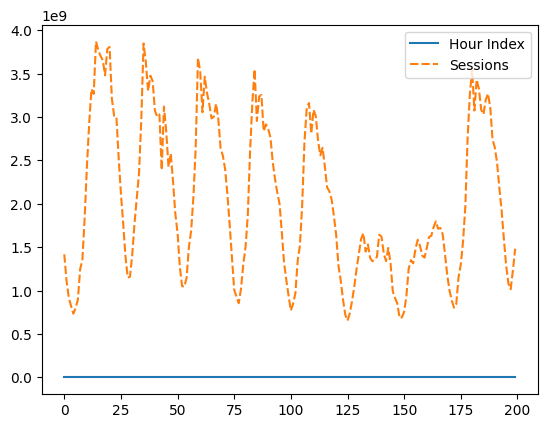

In [8]:
sns.lineplot(df[:200])

In [9]:
from sklearn.model_selection import train_test_split

# Veri setini eğitim ve test kümelerine ayır
train_data, test_data = train_test_split(df, test_size=0.2)

In [10]:
from sklearn.linear_model import LinearRegression

# Lineer regresyon modeli oluştur
model = LinearRegression()

# Eğitim verileri üzerinde modeli eğit
model.fit(train_data[["Sessions"]], train_data["Sessions"])

# Test verileri üzerinde tahmin yap
predictions = model.predict(test_data[["Sessions"]])

# Tahminleri ve gerçek verileri karşılaştır
print(predictions)
print(test_data["Sessions"])

[1.68961569e+09 1.67863768e+09 1.63272964e+09 1.86725987e+09
 2.63472264e+09 1.87923588e+09 1.14770115e+09 3.22254523e+09
 1.28941729e+09 1.51696152e+09 1.22454723e+09 1.91216992e+09
 1.18662319e+09 1.78242979e+09 2.87623888e+09 2.01696002e+09
 3.70058771e+09 4.27942829e+09 3.39420140e+09 1.47704148e+09
 2.65168866e+09 4.20058621e+09 2.70258671e+09 2.74849475e+09
 3.62573763e+09 1.86626187e+09 1.63971564e+09 1.87923588e+09
 8.11374813e+08 3.76346177e+09 3.10577911e+09 2.37224838e+09
 3.86525787e+09 4.06485807e+09 1.89520390e+09 1.60478561e+09
 1.06786107e+09 3.07184708e+09 3.32633733e+09 1.58582359e+09
 3.12474113e+09 3.13172714e+09 9.55086957e+08 3.21256522e+09
 1.62674163e+09 1.64769965e+09 1.83632184e+09 3.44010945e+09
 1.07883908e+09 1.89021389e+09 2.53891454e+09 1.46805947e+09
 2.02793803e+09 3.06286507e+09 1.37624338e+09 3.22354323e+09
 2.03093204e+09 1.25548526e+09 2.99999101e+09 3.43711544e+09
 1.66167167e+09 8.37322839e+08 4.07683408e+09 3.56984958e+09
 3.06386307e+09 4.018950

In [11]:
from sklearn.metrics import r2_score

# R^2 score'u hesapla
r2 = r2_score(test_data["Sessions"], predictions)

# Skoru görüntüle
print("R^2 score:", r2)

R^2 score: 1.0


In [12]:
from keras.models import Sequential
from keras.layers import Dense

# Yapay sinir ağı modelini oluştur
model = Sequential()
model.add(Dense(8, input_dim=1, activation="relu"))
model.add(Dense(1))

# Modeli derle
model.compile(loss="mean_squared_error", optimizer="adam")

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
from sklearn.model_selection import train_test_split

# Verileri eğitim ve test setleri olarak ayır
train_data, test_data = train_test_split(df, test_size=0.2)

# Modeli eğit
model.fit(train_data["Sessions"], train_data["Sessions"], epochs=100, batch_size=8)

# Test verileri üzerinde tahmin yap
predictions = model.predict(test_data["Sessions"])

# R^2 score'u hesapla
r2 = r2_score(test_data["Sessions"], predictions)
print("R^2 score:", r2)

# MSE değerini hesapla
mse = mean_squared_error(test_data["Sessions"], predictions)
print("MSE:", mse)

Epoch 1/100
490/490 [==============================] - 3s 4ms/step - loss: 767884489748643840.0000
Epoch 2/100
490/490 [==============================] - 1s 3ms/step - loss: 46701972815872.0000
Epoch 3/100
490/490 [==============================] - 1s 3ms/step - loss: 16245616.0000
Epoch 4/100
490/490 [==============================] - 1s 2ms/step - loss: 1620345.6250
Epoch 5/100
490/490 [==============================] - 1s 1ms/step - loss: 906726.3750
Epoch 6/100
490/490 [==============================] - 1s 2ms/step - loss: 476588.8438
Epoch 7/100
490/490 [==============================] - 1s 2ms/step - loss: 301767.2500
Epoch 8/100
490/490 [==============================] - 1s 2ms/step - loss: 173422.0938
Epoch 9/100
490/490 [==============================] - 1s 2ms/step - loss: 109883.8828
Epoch 10/100
490/490 [==============================] - 1s 1ms/step - loss: 69628.8594
Epoch 11/100
490/490 [==============================] - 1s 1ms/step - loss: 43915.8984
Epoch 12/100
490/490

In [36]:
import pandas as pd
import numpy as np

# Veri setini yükle
df = pd.read_csv("webtraffic.csv")

# Verilerin indekslerini zaman damgasına dönüştür
df.index = pd.to_datetime(df.index)

# Eksik değerleri doldur
df.fillna(method='ffill', inplace=True)

# Verileri standartlaştır
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Veri setini eğitim ve test verisi olarak ayır
train_size = int(len(df) * 0.8)
train, test = df_scaled[0:train_size,:], df_scaled[train_size:len(df),:]

In [38]:
def create_time_series(dataset, lookback):
    X, y = [], []
    for i in range(len(dataset)-lookback):
        X.append(dataset[i:i+lookback, 0])
        y.append(dataset[i+lookback, 0])
    return np.array(X), np.array(y)

In [39]:
lookback = 10
X_train, y_train = create_time_series(train, lookback)
X_test, y_test = create_time_series(test, lookback)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Modeli tanımla
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(lookback, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Modeli eğit
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)
#Bu model, 50 nöronlu bir LSTM katmanı içerir ve aktivasyon fonksiyonu olarak ReLU kullanır. 

Epoch 1/100
123/123 [==============================] - 4s 11ms/step - loss: 0.0936 - val_loss: 0.0260
Epoch 2/100
123/123 [==============================] - 1s 8ms/step - loss: 2.0157e-04 - val_loss: 0.0238
Epoch 3/100
123/123 [==============================] - 1s 8ms/step - loss: 8.6319e-05 - val_loss: 0.0182
Epoch 4/100
123/123 [==============================] - 1s 8ms/step - loss: 3.7662e-05 - val_loss: 0.0154
Epoch 5/100
123/123 [==============================] - 1s 8ms/step - loss: 1.7551e-05 - val_loss: 0.0130
Epoch 6/100
123/123 [==============================] - 1s 8ms/step - loss: 8.8507e-06 - val_loss: 0.0121
Epoch 7/100
123/123 [==============================] - 1s 8ms/step - loss: 5.6547e-06 - val_loss: 0.0103
Epoch 8/100
123/123 [==============================] - 1s 8ms/step - loss: 3.5066e-06 - val_loss: 0.0094
Epoch 9/100
123/123 [==============================] - 1s 8ms/step - loss: 2.4762e-06 - val_loss: 0.0087
Epoch 10/100
123/123 [==============================] - 1s

In [62]:
y_pred = model.predict(X_test)

# R^2 score'u hesapla
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)

# MSE değerini hesapla
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

31/31 [==============================] - 0s 5ms/step
R^2 score: 0.9744370121887618
MSE: 0.0010033947393364054
